In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.misc
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf
from skimage import color
from skimage import io

In [2]:
trainpath = 'D:/university/third year/selected topics 1/AnnImage/'
testpath = 'D:/university/third year/selected topics 1/AnnImage/'

In [3]:
# Reading files [ training_dataset ] 

for folder in  os.listdir(trainpath + 'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 6000 in folder Trouser
For training data , found 6000 in folder Tshirt


In [4]:
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 1000 in folder Trouser
For testing data , found 1000 in folder Tshirt


In [5]:
code = {'Trouser':0 ,'Tshirt':1}
#######################
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [6]:
# to get more info about train_data  ex:[size of each pic , color , num of each size] 
size = []
for folder in  os.listdir(trainpath +'test') : 
    files = gb.glob(pathname= str( trainpath +'test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(28, 28)    2000
dtype: int64

In [7]:
# to get more info about train_data  ex:[size of each pic , color , num of each size] 
size = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(28, 28)    12000
dtype: int64

In [8]:
# to resize images_train to one equalied size      
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        imgGray = color.rgb2gray( image)
        X_train.append(list(imgGray))
        y_train.append(code[folder])

In [9]:
# to resize images_test to one equalied size 

X_test = []
y_test = []
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str(testpath + 'test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        imgGray = color.rgb2gray( image)
        X_test.append(list(imgGray))
        y_test.append(code[folder])

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
#X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
print(X_train)

[[[0.99215686 1.         0.98431373 ... 1.         1.         1.        ]
  [0.99607843 1.         0.96862745 ... 1.         1.         1.        ]
  [0.96470588 1.         1.         ... 1.         1.         1.        ]
  ...
  [0.98431373 1.         0.99607843 ... 1.         1.         1.        ]
  [0.99607843 1.         0.98823529 ... 1.         1.         1.        ]
  [1.         0.99607843 0.98431373 ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.      

In [12]:
print(y_train)

[0 0 0 ... 1 1 1]


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(2) # linear activation function
])

In [14]:
model.compile(optimizer= 'adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [15]:
import os, datetime

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1856 - accuracy: 0.9148
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1451 - accuracy: 0.9301: 0s - loss: 0.1540 - ac
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1324 - accuracy: 0.9365
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1278 - accuracy: 0.9353
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1241 - accuracy: 0.9375
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9386
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1222 - accuracy: 0.9381: 0s - loss: 0.1155 - accuracy
Epoch 8/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1188 - accuracy: 0.9372
Epoch 9/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1177 - accuracy: 0.9377
Epoch 10/10
375/375 [=========================

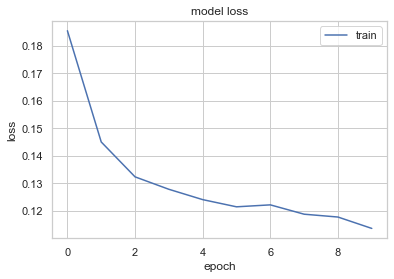

13.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
%%timeit -n1 -r1 # time required toexecute this cell once

# To view in TensorBoard
logdir = os.path.join("logs/adam", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history=model.fit(X_train, y_train, epochs= 10, callbacks = [tensorboard_callback])
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose= 2)
print(f'\nTest accuracy: {test_acc}')

63/63 - 0s - loss: 0.1192 - accuracy: 0.9375 - 349ms/epoch - 6ms/step

Test accuracy: 0.9375


In [17]:
y_pred = model.predict(X_test)
for i in  range(len(y_pred)):
    print([getcode(np.argmax(y_pred[i])),getcode(y_test[i])])

['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Tshirt', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Tshirt', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', 'Trouser']
['Trouser', '

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(np.argmax(y_pred[0]))
predicition=[]
for i in range(len(y_pred)):
  predicition.append(np.argmax(y_pred[i]))
cm = confusion_matrix(y_test, predicition)
print(cm)
accuracy_score(y_test, predicition)

0
[[913  87]
 [ 47 953]]


0.933

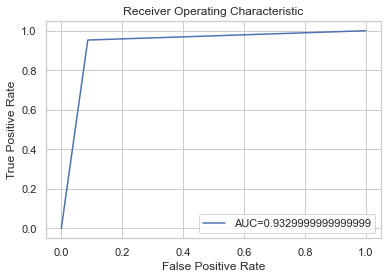

In [37]:
y_pred = model.predict(X_test)
# print(prediction)
# print(y_test)

predicition=[]
for i in range(len(y_pred)):
  predicition.append(np.argmax(y_pred[i]))
fpr, tpr, _ = metrics.roc_curve(y_test,  predicition)
auc = metrics.roc_auc_score(y_test, predicition)
#create ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [38]:
model.save('D:/university/third year/selected topics 1/AnnImage/model.h5',save_format='h5')